In [ ]:
import pandas as pd

df=pd.read_csv("/content/Feedback_Dataset_Sample.csv")
df.head()

df2=pd.read_csv("/content/Feedback_Dataset (6).csv")
df.index

RangeIndex(start=0, stop=300, step=1)

In [ ]:
df.drop("Unnamed: 0",inplace=True,axis=1)
df.columns

Index(['instructor_Name', 'experience', 'knowledge', 'communication',
       'creativity', 'adaptability', 'professionalism',
       'instructor_friendliness', 'patience', 'humor', 'OverallScore',
       'employee_Name', 'motivation', 'learning_speed', 'attention',
       'openness', 'employee_friendliness', 'course_Name', 'difficulty',
       'duration_normalized', 'relevance_course', 'clarity_objectives',
       'quality_materials', 'depth_coverage', 'usefulness_content',
       'knowledge_subject', 'communication_skills', 'engagement_participants',
       'answering_questions', 'pacing_course', 'text'],
      dtype='object')

In [ ]:
dups=df[df.duplicated(subset=["instructor_Name","course_Name"],keep=False)]
print(f"N# of duplicates: {dups.shape[0]}")
dups[["instructor_Name","course_Name"]].set_index("instructor_Name").sort_index().head(10)

N# of duplicates: 44


,course_Name
instructor_Name,
Ahmed Sghir,Web Development with JavaScript
Ahmed Sghir,Web Development with JavaScript
Chahinez Miladi,Health Data Visualization
Chahinez Miladi,Health Data Visualization
Dalila Ouertani,Cloud Computing Fundamentals
Dalila Ouertani,Cloud Computing Fundamentals
Dalila Ouertani,Cloud Computing Fundamentals
Emna Haddad,DevOps in Healthcare
Emna Haddad,DevOps in Healthcare


In [ ]:
print(f"- total N# of instructors: \n  ",df["instructor_Name"].nunique())
print(f"- N# of courses per instructor:")
df["instructor_Name"].value_counts().head(10)

- total N# of instructors: 
   59
- N# of courses per instructor:


instructor_Name
Moncef Jemai       10
Sarra Touati        9
Nabil Fekih         9
Zied Sfar           9
Naima Romdhane      9
Rahma Hattab        8
Nesrine Mansour     8
Najla Kacem         8
Najla Miladi        8
Mokhtar Kouki       7
Name: count, dtype: int64

In [ ]:
import random
from datetime import date, timedelta

start_date = date(2022, 1, 1)
end_date = date(2024, 12, 31)

def random_date(start, end):
  delta = end - start
  int_delta = (delta.days * 24 * 60 * 60) + delta.seconds
  random_second = random.randrange(int_delta)
  return start + timedelta(seconds=random_second)

dates = []
for _ in range(df.shape[0]):
  dates.append(random_date(start_date, end_date))

df["date"] = pd.to_datetime(dates)


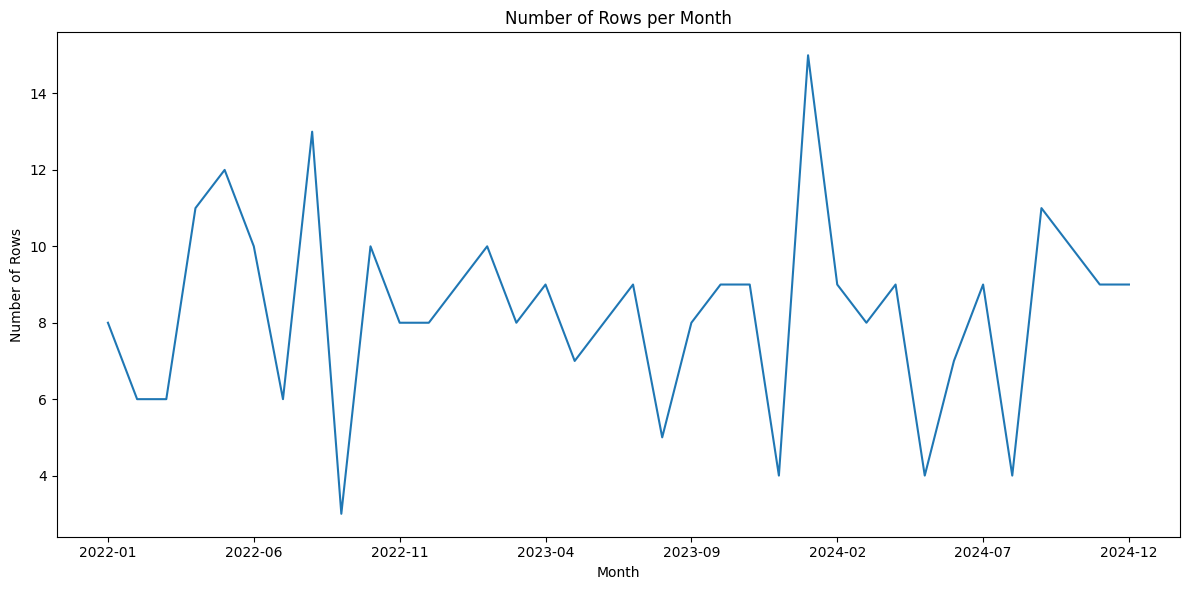

In [ ]:
# prompt: plot the numbers of rows per month

import matplotlib.pyplot as plt

date_month = df['date'].dt.to_period('M').dt.strftime('%Y-%m')
monthly_counts = date_month.value_counts().sort_index()

plt.figure(figsize=(12, 6))
monthly_counts.plot()
plt.xlabel('Month')
plt.ylabel('Number of Rows')
plt.title('Number of Rows per Month')
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# prompt: translate the text column to french and removes bulletpoints

!pip install googletrans==3.1.0a0

from googletrans import Translator
translator = Translator()

def translate_and_remove_bullets(text):
  # Translate to French
  translated = translator.translate(text, dest='fr').text

  # Remove bullet points
  cleaned_text = translated.replace('•', '').replace('●', '').replace('*', '')

  return cleaned_text

df['text_french'] = df['text'].apply(translate_and_remove_bullets)


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.5 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16353 sha256=3d31a6dcbac3d451b3bea8cf1feae6da35c2a711b0858c57904b64319903b8cd
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
 

In [ ]:
df['experience_rating'] = df[['relevance_course', 'clarity_objectives',
       'quality_materials', 'depth_coverage', 'usefulness_content',
       'knowledge_subject', 'communication_skills', 'engagement_participants',
       'answering_questions', 'pacing_course']].mean(axis=1)
print("N# of negative feedback, N# of positive feedback:")
df.loc[df["experience_rating"]<0.5].shape[0],df.loc[df["experience_rating"]>0.5].shape[0]


N# of negative feedback, N# of positive feedback:


(154, 146)

In [ ]:
df.to_csv("feedback_dataset_fr.csv")

In [ ]:
df.columns

Index(['instructor_Name', 'experience', 'knowledge', 'communication',
       'creativity', 'adaptability', 'professionalism',
       'instructor_friendliness', 'patience', 'humor', 'OverallScore',
       'employee_Name', 'motivation', 'learning_speed', 'attention',
       'openness', 'employee_friendliness', 'course_Name', 'difficulty',
       'duration_normalized', 'relevance_course', 'clarity_objectives',
       'quality_materials', 'depth_coverage', 'usefulness_content',
       'knowledge_subject', 'communication_skills', 'engagement_participants',
       'answering_questions', 'pacing_course', 'text', 'date', 'text_french',
       'experience_rating'],
      dtype='object')